In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#^^^^^^ Show multiple outputs from one cell ^^^^^
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd
import json
import pickle
import sklearn
import scipy
from pandasql import *
from pandasql import sqldf

# Data Dictionary

 Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's

# Exploring Data Using Pandas Methods

In [2]:
df=pd.read_csv('/Users/Work/Desktop/Work/Projects/Datasets/Boston_Housing/boston_housing.csv')

In [5]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [6]:
df['garbage']=np.full(len(df),'1. Garbage_Column _',dtype=object)  #str dtype defaults to char length of 1
#while object datatype has variable length. 'S7' dtype has length of 7, 'Sx' dtype has length of x.  
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,garbage
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,1. Garbage_Column _


# DataFrame Methods for Columns and Index

### Rename all columns to lowercase

In [3]:
df.columns = df.columns.str.lower()                    #lower() method of str attribute
df.columns = map(str.lower,df.columns)                 #lower attribute of str object
df.columns = map(lambda x: x.lower(), df.columns)      #map method
df.columns = [x.lower() for x in df.columns]           #list comprehension  

In [ ]:
df.columns = map(str.lower,df.columns)

### Rename a column

In [6]:
df.rename(columns={'b':'black'},inplace=True)

### Drop a column

In [7]:
df=df.drop('garbage',axis=1).head(1)

### Move columns around

In [18]:
#create new list of columns in your desired order
#move last column to first position
cols=df.columns.tolist() #make a list out of column values
cols2=[cols[-1]]+cols[0:(len(cols)-1)]  #make list of the last column moved to first spot
df[cols2].head(1)

#move col j to spot k

,garbage,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1. Garbage_Column _,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


### Add a column to the DataFrame

In [11]:
df=df.assign(medv_transformed=df.medv**2)
df=df.assign(index2=range(1,len(df)+1))              #df=df.assign(col=...)
df['medv_transformed']=np.round(np.sqrt(df.medv),2)  #df['col']=... makes or updates col
print df.columns.tolist()

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv', 'medv_transformed', 'index2']


### Reset index to be from (0,1,2,3...) if it isn't

In [41]:
young1=df[df.age<30]
young2=young.reset_index(drop=True)

young1.head(2).index.tolist()
young2.head(2).index.tolist()
#move original index values out of index to become a column since they aren't in order (0,1,2,3,..), and DROP it !
#new index IS in order (0,1,2,3)

[16, 39]

[0, 1]

# DataFrame Methods

### Apply a function to every element

In [7]:
f = lambda x: np.round(x,0)
df.applymap(f).head(1) #operates on one element at a time aka works "element-wise" on a DataFrame

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.0,18.0,2.0,0,1.0,7.0,65.0,4.0,1,296,15.0,397.0,5.0,24.0


### Generate a statistic for every row or column

In [56]:
f = lambda x: np.sum(x)
df.apply(f,axis=0)[:5] #axis=0 applies aggregate function to each column

CRIM     1828.44
ZN          5750
INDUS    5635.21
CHAS          35
NOX      280.676
dtype: object

### Change every element to a different data type, like int

In [98]:
df.astype(int).head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0,18,2,0,0,6,65,4,1,296,15,396,4,24


### Create a cross tabulation of two variables (a contingency table).  This shows the relationship between two categorical variables through their frequencies.

In [26]:
pd.crosstab(df.chas,df.rad) #(index=, columns=)

rad,1,2,3,4,5,6,7,8,24
chas,,,,,,,,,
0,19,24,36,102,104,26,17,19,124
1,1,0,2,8,11,0,0,5,8


### Set/change a value for a cell

In [42]:
#you do NOT need to set df=df.set_value() for the change to go into effect in the df
df.set_value(0,'garbage',np.NaN) #set_value(row index, column name, value)
df.set_value(1,'garbage',np.NaN)
df.set_value(2,'garbage',np.NaN)
df.set_value(3,'garbage',np.NaN);

In [43]:
df.head(2) # we've set the first several values equal to missing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,garbage
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,NaN


### Plot one column (x) against another column (y)

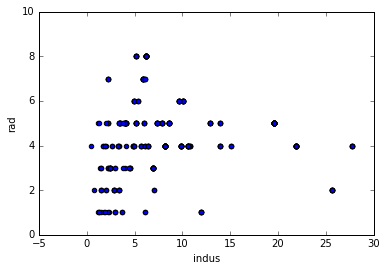

In [51]:
df.plot(x='indus',y='rad',kind='scatter',ylim=[0,10])

### Return rows (or columns) with at least one null value

In [6]:
df.set_value(12,'crim',np.NaN); 

In [40]:
df[pd.isnull(df).any(axis=1)] #pd.isnull(df) returns a df of True/Falses
# .any(axis=1) returns any row that has at least one True in the 'null df', meaning a null val
# .any(axis=0) returns any col that has at least one True in the 'null df'

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,garbage
12,NaN,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.5,15.71,21.7,1. Garbage_Column _


### Return counts of groupby tuple values: # of obs with (age,height): (18, 5'8), (19, 5'9)

In [6]:
c=df.groupby(['rad', 'chas']).size() #creates 2-level hierarchical index with the 
                                     #outermost index has level 0, innermost having level k
c.head(4)
c[1,0]   #c[level 0 value, level 1 value]
         #access value 1 of level 0 (rad), and value 0 of level 1 (chas) value

rad  chas
1    0       19
     1        1
2    0       24
3    0       36
dtype: int64

19

### Groupby col1, take the mean of all cols for each distinct col1 value, return col2 means

In [22]:
df.groupby('rad').mean()['medv'].sort_values(ascending=False)[:3]

rad
8    30.358333
3    27.928947
7    27.105882
Name: medv, dtype: float64

### Return only rows with certain column values

In [12]:
df[(~df['TAX'].isin(range(300,500))) & (df['AGE']>30)].head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


# Series Methods

In [5]:
df['garbage']=np.full(len(df),'1. Garbage_Column _',dtype=object)
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,garbage
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,1. Garbage_Column _


### Remove superfluous characters from a string column

In [6]:
df.garbage=df.garbage.map(lambda x: x.split('.')[-1]) # map works "element-wise" on a Series
df.garbage[:5]
#splits string into portion to left of '.' and portion to right of '.' as elements in a list
#and returns just the right portion.

0     Garbage_Column _
1     Garbage_Column _
2     Garbage_Column _
3     Garbage_Column _
4     Garbage_Column _
Name: garbage, dtype: object

### Return unique values of a column

In [14]:
df.rad.unique() #returns values in a numpy array

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

### Return counts of unique values in a column, sorted by the INDEX in ascending order, and plotted

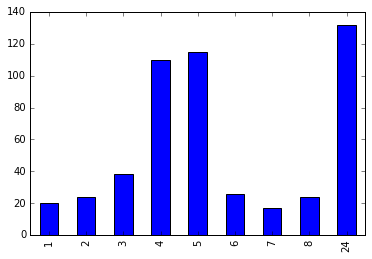

In [39]:
df.rad.value_counts().sort_index(ascending=True).plot(kind='bar')

### Return counts of unique values in a column, sorted by COUNTS in ascending order, and plotted

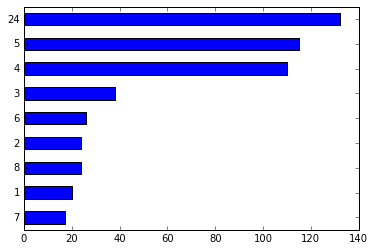

In [37]:
df.rad.value_counts().sort_values(ascending=True).plot(kind='barh') #asc=True affects frequencies, not rad values

# Pandas Series and Index String Methods

In [5]:
import pickle
o = open('/Users/Work/Desktop/Work/Projects/Springboard/Final_Files/reviews_pickle.pkl','r')
df2=pickle.load(o)
df2=pd.DataFrame(df2)
o.close()
text=df2.text
text=' _'+text+'_ ' #add these characters to beginning/end of each list element

In [6]:
#text.str.len() #return length of each string
text2=text.str.strip() #by default, leading/trailing whitespace characters are removed
text2=text2.str.strip('_') #strip leading/trailing _ characters
text3=text.str.lstrip() #strip leading characters only
text3=text.str.rstrip() #strip trailing characters only
text3=text.str.lower().str.replace('_','').str.strip() #replacing _ with nothing deletes it
text4=text3.str.split(' ') #split each text element into a list of elements; splitter = space
text5=text3.str.split(' ',expand=True) 
#expand above into dataframe where each row, a review, has a column for each word in review
print(text4[0])[:5] #the first review
text5.head(1)

[u'this', u'is', u'a', u'tiny', u'starbucks']


,0,1,2,3,4,5,6,7,8,9,...,983,984,985,986,987,988,989,990,991,992
0,this,is,a,tiny,starbucks,and,it,locations,like,this,...,None,None,None,None,None,None,None,None,None,None
